In [1]:
# Import all of the requried libraries
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pandas as pd
# import statistics
from statistics import mode,mean
from scipy import interpolate

### Data Loading and splicing 
* Load in the raw data + baselines and convert it into a useable list of numpy arrays


In [2]:
# This function is used to load the data into python
def loadData(datapath):
    p = []
    for i in range(lenth):
        p.append(pd.read_csv(datapath + str(i+1) + '.csv'))
    return p

In [3]:
def loadDataset(datapath,numfiles):
    Dataset = []
    for i in range(numfiles):
        # Loading in the data
        if i < 9:
            numAsString = '0' + str(i+1)
        else:
            numAsString + str(i+1)
        filename = datapath + numAsString + '.csv'    
        df = pd.read_csv(filename, sep=';',engine='python')
        # Extracting Relvant information
        # 32 for start, 774 for 350 nm
#         data = df[32:-1] # ******************************************* flag
        data = df[774:-1]
        
        data_arr = data.to_numpy()
        Dataset.append(data_arr)
    Dataset = np.array(Dataset,dtype='float').squeeze()
    return Dataset

# Load in the raw data
path = '../BroadbandProject/rawdata/'    
BeefData = loadDataset(path + 'BeefData/',36)
B_labels = 0*np.ones(len(BeefData))
ChickenData = loadDataset(path + 'ChickenData/',36)
C_labels = 1*np.ones(len(ChickenData))
PorkData = loadDataset(path + 'PorkData/',36)
P_labels = 2*np.ones(len(PorkData))
TurkeyData = loadDataset(path + 'TurkeyData/',36)
T_labels = 3*np.ones(len(TurkeyData))

# Load in the baselines


### Display the raw data
* Display a pork and chicken sample
* Display the broadband source output

Text(0.5, 1.0, 'Unprocessed Pork Spectrum')

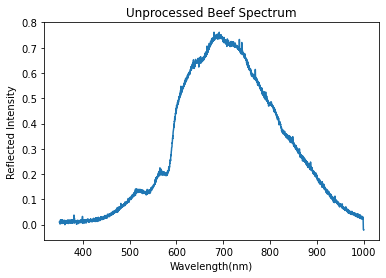

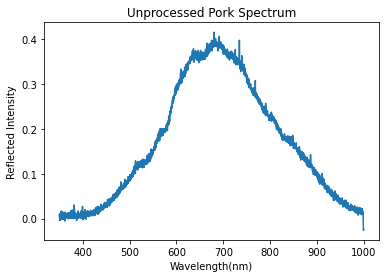

In [4]:
def plotall(data):
    for i in range(len(data)):
        plt.figure(i+1)
#         scaling = 1.5**i+1
        scaling = 1
        plt.plot(data[i,:]*(scaling))
#         print((scaling))
        plt.title(str(i+1))
    
# plotall(BeefData)
# plotall(TurkeyData)
# plotall(ChickenData)
# plotall(PorkData)

w = np.linspace(350,1000,len(BeefData[1]))
plt.figure()
plt.plot(w,BeefData[1])
plt.xlabel('Wavelength(nm)')
plt.ylabel('Reflected Intensity')
plt.title('Unprocessed Beef Spectrum')

plt.figure()
plt.plot(w,PorkData[1])
plt.xlabel('Wavelength(nm)')
plt.ylabel('Reflected Intensity')
plt.title('Unprocessed Pork Spectrum')

### Preprocessing of the data
* Crop to 360nm to 1000nm
* Normalize (MinMax norm)
* Subtract the normalized broadband output


In [5]:
# Normalize peak instensity to 1.0
def normalize(data):
    temp = data.copy()
    if len(temp) > 1000:
        temp = (temp - min(temp))
        temp = temp/max(temp)
    else:
        for i in range(len(temp)):
            temp[i] = (temp[i] - min(temp[i]))
            temp[i] = temp[i]/max(temp[i])
    return temp
 
def subtractBaseline(data,baseline):
    temp = data.copy()
    for i in range(len(temp)):
        temp[i] = temp[i]-baseline
    return temp

#### Load in
* Broadband output
* White paper

[ 0.00617349  0.00704911  0.00594012 ... -0.0014056  -0.00200787
 -0.00141695]
Number of points:  2905


Text(0.5, 1.0, 'White Paper')

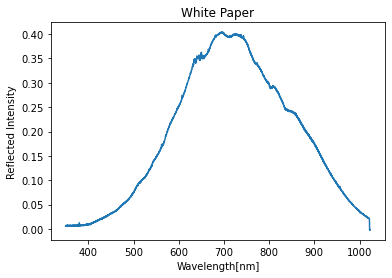

In [6]:
# Load in the white paper
df = pd.read_csv(path + 'white_baseline.csv', sep=';',engine='python')
df['Wavelength'] = df.index
# data = df[32:-1] #------------------------------------------------------- flag [200nm = 32, 350nm = 774]
data = df[774:-1]


data_arr = data.to_numpy()
baseline_pap = np.array(data_arr,dtype='float')
print(baseline_pap[:,0])
print("Number of points: ",len(baseline_pap))

w = np.linspace(350,1000,len(baseline_pap))
plt.plot(baseline_pap[:,1],baseline_pap[:,0])
plt.xlabel("Wavelength[nm]")
plt.ylabel('Reflected Intensity')
plt.title('White Paper')

(675, 6)
Number of points:  675


Text(0, 0.5, 'Reflected Intensity')

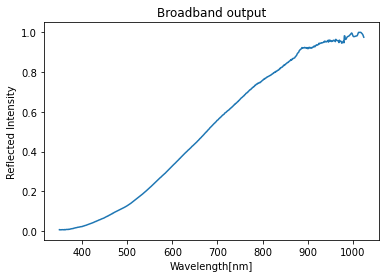

In [11]:
# Load in the broadband outputs 
path = '../BroadbandProject/rawdata/'    
df = pd.read_csv(path + 'SLS201L_Spectrum_reformatted.csv',engine='python')
data = df[0:675]
data_arr = data.to_numpy()
baseline_BrOut = np.array(data_arr,dtype='float').squeeze()

print("Number of points: ",len(baseline_BrOut))

plt.plot(baseline_BrOut[:,0],baseline_BrOut[:,1])
plt.xlabel("Wavelength[nm]")
plt.title('Broadband output')
plt.ylabel('Reflected Intensity')

Number of points:  2905


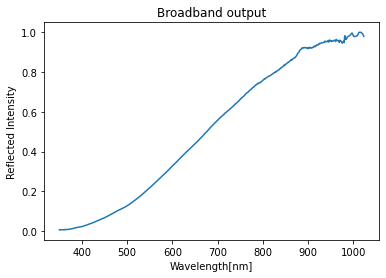

In [8]:
# Interpolate such that the downloaded spectrum has the same values of as the data
x = baseline_BrOut[:,0]
y = baseline_BrOut[:,1]
f = interpolate.interp1d(x,y)
xnew = baseline_pap[:,1]
ynew = f(xnew)

plt.figure()
plt.plot(xnew,ynew)
plt.xlabel("Wavelength[nm]")
plt.title('Broadband output')
plt.ylabel('Reflected Intensity')
print("Number of points: ",len(ynew))

baseline_BrOut = ynew

In [9]:
# Load in the baseline 
baseline = baseline_BrOut # --------------------------------- flag
baseline = baseline_pap[:,0]
baseline = normalize(baseline)

# Normalize all data
B_norm = normalize(BeefData)
B_saved = B_norm
B_norm = subtractBaseline(B_norm,baseline)
B_norm = normalize(B_norm)

P_norm = normalize(PorkData)
P_saved = P_norm
P_norm = subtractBaseline(P_norm,baseline)
P_norm = normalize(P_norm)

T_norm = normalize(TurkeyData)
T_norm = subtractBaseline(T_norm,baseline)
T_norm = normalize(T_norm)

C_norm = normalize(ChickenData)
C_norm = subtractBaseline(C_norm,baseline)
C_norm = normalize(C_norm)

print('Size of Beef data,', B_norm.shape)
print('Size of Pork data,', P_norm.shape)
print('Size of Turkey data,', T_norm.shape)
print('Size of Chicken data,', C_norm.shape)

Size of Beef data, (36, 2905)
Size of Pork data, (36, 2905)
Size of Turkey data, (36, 2905)
Size of Chicken data, (36, 2905)


Text(0.5, 0, 'Wavelength(nm)')

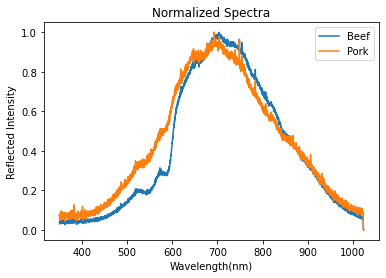

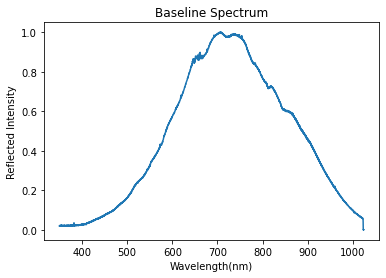

In [10]:
w = np.linspace(350,1024,len(BeefData[1]))
plt.figure()
plt.plot(w,B_saved[1])
plt.plot(w,P_saved[1])
plt.xlabel('Wavelength(nm)')
plt.ylabel('Reflected Intensity')
plt.title('Normalized Spectra')

plt.legend(['Beef','Pork'])

plt.figure()
plt.plot(w,baseline)
plt.title('Baseline Spectrum')
plt.ylabel('Reflected Intensity')
plt.xlabel('Wavelength(nm)')

Text(0.5, 1.0, 'Turkey normalized')

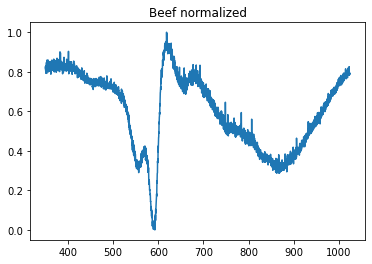

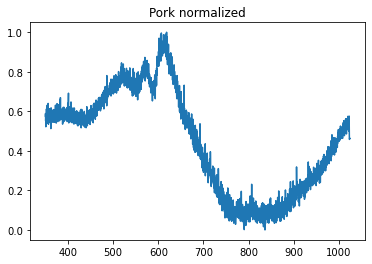

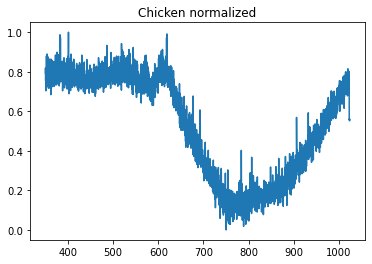

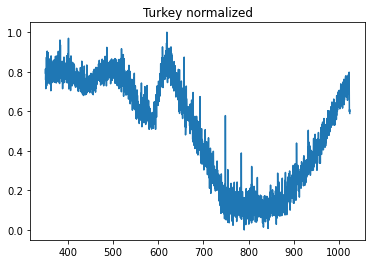

In [16]:
idx = 0
w = np.linspace(350,1024,len(BeefData[1]))
plt.figure()
plt.plot(w,B_norm[idx])
plt.title('Beef normalized')
plt.figure()
plt.plot(w,P_norm[idx])
plt.title('Pork normalized')
plt.figure()
plt.plot(w,C_norm[idx])
plt.title('Chicken normalized')
plt.figure()
plt.plot(w,T_norm[idx])
plt.title('Turkey normalized')

Text(0.5, 0, 'Wavelength(nm)')

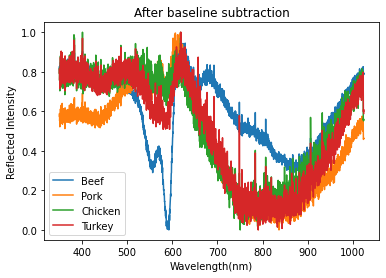

In [17]:
idx = 0
plt.figure()
plt.plot(w,B_norm[idx])
plt.plot(w,P_norm[idx])
plt.plot(w,C_norm[idx])
plt.plot(w,T_norm[idx])
plt.title('After baseline subtraction')
plt.legend(['Beef','Pork','Chicken','Turkey'])
plt.ylabel('Reflected Intensity')
plt.xlabel('Wavelength(nm)')

# plt.figure()
# plt.plot(np.transpose(B_norm))

# plt.figure()
# plt.plot(np.transpose(P_norm))


array([0.90895412, 0.9109255 , 0.89037219, ..., 0.82491353, 0.82674929,
       0.82025169])

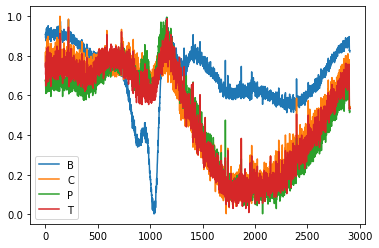

In [18]:
# Plotting all of the normalized results after baseline subtraction
# plotall(B_norm)
# plotall(C_norm)
# plotall(P_norm)
# plotall(T_norm)

# Plot the averages of each 
# print(B_norm.shape)

plt.figure()
plt.plot(np.mean(B_norm,axis=0))
plt.plot(np.mean(C_norm,axis=0))
plt.plot(np.mean(P_norm,axis=0))
plt.plot(np.mean(T_norm,axis=0))
plt.legend(['B','C','P','T'])
xtemp = [[1,1],[2,2],[3,3],[4,4],[5,5]]
np.mean(B_norm,axis=0)

### The next step is dimensionality reduction
* Use PCA for dimensionality reduction

In [19]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=0.9999, svd_solver='full')
pca = PCA(n_components=35) 
# The proper way to do this is to do pca.fit to the training data. Set the n_components to the minimum of the sets so 35

# X_train, X_val, X_test = stratdata(B_norm,C_norm,P_norm,T_norm,i)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_val = pca.transform(X_val)
# X_test = pca.transform(X_test)

# # This is a poor way to do it
# B_reduced = pca.fit_transform(B_norm)
# C_reduced = pca.fit_transform(C_norm)
# P_reduced = pca.fit_transform(P_norm)
# T_reduced = pca.fit_transform(T_norm)
# print(B_reduced.shape)

# select if I want to use the full or reduced dataset

# B_data   = B_reduced.copy()
# C_data   = C_reduced.copy()
# P_data   = P_reduced.copy()
# T_data   = T_reduced.copy()

B_data = B_norm.copy()
C_data = C_norm.copy()
P_data = P_norm.copy()
T_data = T_norm.copy()

B_labels = 0*np.ones(len(B_data))
C_labels = 1*np.ones(len(C_data))
P_labels = 2*np.ones(len(P_data))
T_labels = 3*np.ones(len(T_data))

B_data.shape

(36, 2905)

### Stratify data

In [21]:
# This function takes in the beef,chicken,pork, and turkey data
def stratdata(b,c,p,t,case):
    # Break each into 
    b1,b2,b3,b4 = chunkdata(b)
    c1,c2,c3,c4 = chunkdata(c)
    p1,p2,p3,p4 = chunkdata(p)
    t1,t2,t3,t4 = chunkdata(t)
    
    d1 = np.concatenate([b1,c1,p1,t1])
    d2 = np.concatenate([b2,c2,p2,t2])
    d3 = np.concatenate([b3,c3,p3,t3])
    d4 = np.concatenate([b4,c4,p4,t4])
    
    # implement a switch-case
    if case == 1:
        train = np.concatenate([d1,d2])
        val   = d3
        test  = d4
    elif case == 2:
        train = np.concatenate([d1,d3])
        val   = d2
        test  = d4
    elif case == 3:
        train = np.concatenate([d2,d3])
        val   = d1
        test  = d4
    elif case == 4:
        train = np.concatenate([d1,d2])
        val   = d4
        test  = d3
    elif case == 5:
        train = np.concatenate([d1,d4])
        val   = d2
        test  = d3
    elif case == 6:
        train = np.concatenate([d2,d4])
        val   = d1
        test  = d3
    elif case == 7:
        train = np.concatenate([d1,d4])
        val   = d3
        test  = d2
    elif case == 8:
        train = np.concatenate([d1,d3])
        val   = d4
        test  = d2
    elif case == 9:
        train = np.concatenate([d4,d3])
        val   = d1
        test  = d2
    elif case == 10:
        train = np.concatenate([d2,d4])
        val   = d3
        test  = d1
    elif case == 11:
        train = np.concatenate([d3,d4])
        val   = d2
        test  = d1
    elif case == 12:
        train = np.concatenate([d2,d3])
        val   = d4
        test  = d1
    else:
        print("Invalid case selected!")
    
    return train,val,test

# Breaks the data into 4 corner chunks
def chunkdata(data):    
    data = data.copy()
    d1 = data[[0,1,2,6,7,8,12,13,14]]
    d2 = data[[3,4,5,9,10,11,15,16,17]]
    d3 = data[[18,19,20,24,25,26,30,31,32]]
    d4 = data[[21,22,23,27,28,29,33,34,35]]
    return d1,d2,d3,d4

#X_train, X_val, X_test = stratdata(B_data,C_data,P_data,T_data,1)
#y_train, y_val, y_test = stratdata(B_labels,C_labels,P_labels,T_labels,1)

In [22]:
# from sklearn.model_selection import train_test_split

# # Concatinate the data into a single dataset and labelset
# features = np.concatenate([B_data,C_data,P_data,T_data])
# print(features.shape)
# labels = np.concatenate([B_labels,C_labels,P_labels,T_labels])
# print(labels.shape)
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=56)

### Machine learning models

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,f1_score,roc_auc_score
from random import Random

F1s = []
Accs = []
cf_matrix = 0
# for i in range(1,13):
for i in range(2):
    X_train, X_val, X_test = stratdata(B_data,C_data,P_data,T_data,i+1)
    y_train, y_val, y_test = stratdata(B_labels,C_labels,P_labels,T_labels,i+1)
    X_train = np.concatenate([X_train,X_val])
    y_train = np.concatenate([y_train,y_val])
#     print(X_train.shape)
    
    # Randomize the training set so it's not so clumped
#     X_train = np.transpose(X_train)
#     y_train = np.transpose(y_train)
# #     Random(i).shuffle(X_train)
# #     Random(i).shuffle(y_train)
#     X_train = np.transpose(X_train)
#     y_train = np.transpose(y_train)
#     print(X_train.shape)
    # Instantiate the model
    modelKNN = KNeighborsClassifier(n_neighbors=3)

    # Train the model
    modelKNN.fit(X_train,y_train)
    
    # Test the model
    predicted = modelKNN.predict(X_test)       
    F1s.append(f1_score(y_test,predicted,average='weighted'))
    Accs.append(accuracy_score(y_test,predicted))
    cf_matrix += confusion_matrix(y_test, predicted)
    
print(cf_matrix/sum(cf_matrix))    
# plt.figure()
# plt.plot(np.transpose(X_train))
# print(X_train.shape)
print('F1s', F1s)
print('The mean f1 score is: ',np.mean(F1s))
print('The mean accuracy is: ',np.mean(Accs))



[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
F1s [1.0, 1.0]
The mean f1 score is:  1.0
The mean accuracy is:  1.0


In [24]:
xtemp = [[1,1],[2,2],[3,3],[4,4],[5,5]]
ytemp = [1,2,3,4,5]
# for i in range(10):
#     Random(i).shuffle(xtemp)
#     Random(i).shuffle(ytemp)
#     print(xtemp)
#     print(ytemp)
    
xtemp = np.transpose(xtemp)
y_train = np.transpose(y_train)
Random(i).shuffle(X_train)
Random(i).shuffle(y_train)
X_train = np.transpose(X_train)
y_train = np.transpose(y_train)


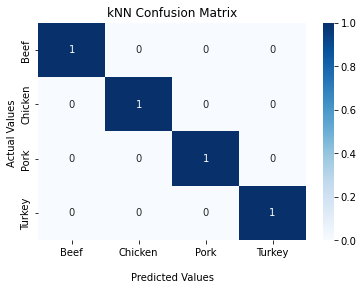

In [25]:
import seaborn as sns

# ax = sns.heatmap(cf_matrix/sum(cf_matrix), annot=True, fmt='.2%',cmap='Blues')
ax = sns.heatmap(cf_matrix/sum(cf_matrix), annot=True, cmap='Blues')

ax.set_title('kNN Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Beef','Chicken', 'Pork', 'Turkey'])
ax.yaxis.set_ticklabels(['Beef','Chicken', 'Pork', 'Turkey'])

# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,f1_score,roc_auc_score

F1s = []
Accs = []
# 3-fold cross validation of an SVM
for i in range(1,13):
    X_train, X_val, X_test = stratdata(B_data,C_data,P_data,T_data,i)
    y_train, y_val, y_test = stratdata(B_labels,C_labels,P_labels,T_labels,i)
    
    modelSVM = SVC()
    modelSVM.fit(X_train,y_train)

    # Test the model
    predicted = modelSVM.predict(X_val) 

    # Test the model      
    F1s.append(f1_score(y_test,predicted,average='weighted'))
    Accs.append(accuracy_score(y_test,predicted))
print('The mean f1 score is: ',np.mean(F1s))
print('The mean accuracy is: ',np.mean(Accs))


The mean f1 score is:  0.7900048276886511
The mean accuracy is:  0.8356481481481483


### Implementing CNN


In [27]:
# Input parameters

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision.transforms.functional as TF
import pandas as pd

print('Cuda is available? ',torch.cuda.is_available())

Cuda is available?  True


In [28]:
class CNN1d(nn.Module):
    def __init__(
        self, in_channels=1,out_channels=4
    ):
        super(CNN1d,self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1) # same conv helps with input size
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.ReLU = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool1d(kernel_size=4, stride=4)
        # in_features should be number of features after all the conv and max pooling*
        # in_features = out_channels * feature width so  24 * processed(3646) = 454 if not same conv
        self.fc1 = nn.Linear(in_features=128*45,out_features=256) 
        self.fc2 = nn.Linear(in_features=256, out_features=4) # out_features is num classes
        
    def forward(self,x):
        # conv layer 1
        x = self.ReLU(self.conv1(x))
        x = self.pool(x)
        # conv layer 2
        x = self.ReLU(self.conv2(x))
        x = self.pool(x)
        # conv layer 3
        x = self.ReLU(self.conv3(x))
        x = self.pool(x)
#         print('Shape after conv3', x.shape) # **********************************
        x = x.view(-1,128*45) # flatten the tensor
        # fully connected 1
        x = self.fc1(x)
        x = self.ReLU(x)
        #fully connected 2
        x = self.fc2(x)
        x = torch.softmax(x,dim=1)
        return x
        
# define a random test to see if things are running
def test():
    x = torch.randn((1,1,2905))
    model = CNN1d(in_channels=1,out_channels=4)
    preds = model(x)
    print(preds.shape)
    print(x.shape)
    print(preds)
if __name__ == "__main__":
    test()

torch.Size([1, 4])
torch.Size([1, 1, 2905])
tensor([[0.2359, 0.2773, 0.2402, 0.2466]], grad_fn=<SoftmaxBackward>)


### Set up training loop

In [29]:
def save_checkpoint(state, filename ="my_checkpoint.pth.tar"):
    print("=>Saving checkpoint")
    torch.save(state,filename)
    
def load_checkpoint(checkpoint,model):
    print("=>Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])

In [30]:
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from tqdm import tqdm

# define a train loader
def get_loaders(train_x,train_y,val_x,val_y,test_x,test_y,batch_size):
    
    #Convert the dataset to tensor format
    train_x, train_y = torch.Tensor(train_x).unsqueeze(1), torch.Tensor(train_y)
    val_x, val_y = torch.Tensor(val_x).unsqueeze(1), torch.Tensor(val_y)
    test_x, test_y = torch.Tensor(test_x).unsqueeze(1), torch.Tensor(test_y)
    
    # put the data into data loaders
    train_data = TensorDataset(train_x,train_y)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    
    val_x, val_y = torch.Tensor(val_x), torch.Tensor(val_y)
    val_data = TensorDataset(val_x, val_y)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)

    test_x, test_y = torch.Tensor(test_x), torch.Tensor(test_y)
    test_data = TensorDataset(test_x, test_y)
    test_loader = DataLoader(test_data, shuffle=False)
    
    return train_loader, val_loader, test_loader

# define a training loop 
def train_fn(loader,model,optimizer,loss_fn,scaler):
    loop = tqdm(loader)
    for batch_idx, (data, targets) in enumerate(loop):
        # Send the data to the GPU
        data = data.to(device=DEVICE)
        # Send the masks to the GPU
        targets = targets.float().to(device=DEVICE)
        
        # forward
        predictions = model(data)
        # To get the predictions in usable form I need to take the Softmax
        predictions = predictions
        
        loss = loss_fn(predictions,targets.long())
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # update tqdm loop to show the loss function so far
        loop.set_postfix(loss=loss.item())
        scaler = torch.cuda.amp.GradScaler() 
        

def check_f1(loader,model,device="cuda"):
    with torch.no_grad():
        L = []
        P = []
        # Loop through the loader
        for data, label in loader:
            data = data.to(DEVICE)
            labels = label.to(DEVICE)
            outputs = model(data)
            _, preds = torch.max(outputs, 1)
            # Loop through the batch
            for i in range(np.array(labels.shape)[0]):
                label = labels[i]
                pred = preds[i]
                L.append(label.long())
                P.append(pred)

    P = torch.Tensor(P).long()
    L = torch.Tensor(L).long()

    acc = torchmetrics.functional.accuracy(P,L) 
    f1 = f1_score(P,L,average='weighted')
    return acc, f1

In [31]:
import torchmetrics
# LOAD_MODEL = True
LOAD_MODEL = False

# hyperparameters
LEARNING_RATE = 1e-3
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE   = 10
NUM_EPOCHS   = 20

# Instantiate the model and send to GPU
model = CNN1d(in_channels=1, out_channels=1).to(DEVICE)
# Instiantiate the Dice Loss function
loss_fn = nn.CrossEntropyLoss()
# Add an optimizer and scaler
optimizer = optim.Adam(model.parameters(),lr=LEARNING_RATE)
scaler = torch.cuda.amp.GradScaler()
# get the DataLoaders
train_loader, val_loader, test_loader = get_loaders(X_train,y_train,X_val,y_val,X_test,y_test,BATCH_SIZE)

if LOAD_MODEL:
    load_checkpoint(torch.load("my_checkpoint.pth.tar"),model)
else:
    scores_train = [] 
    scores_val = [] 
    scores_test = []
    for epoch in range (NUM_EPOCHS):
        print('Epoch:',epoch)
        train_fn(train_loader,model, optimizer, loss_fn, scaler)
        # save model
         
        checkpoint = {
            "state_dict": model.state_dict(), 
            "optimizer": optimizer.state_dict(),
        }
        save_checkpoint(checkpoint)
        
        
        #check accuracy  
        acc_train, f1_train = check_f1(train_loader, model, device = DEVICE)
        scores_train.append(np.array([acc_train, f1_train]))
        
        acc_val, f1_val = check_f1(val_loader, model, device = DEVICE)
        scores_val.append(np.array([acc_val, f1_val]))
        
        acc_test, f1_test = check_f1(test_loader, model, device = DEVICE)
        scores_test.append(np.array([acc_test, f1_test]))
        
        if epoch == NUM_EPOCHS-1:
            acc_test, f1_test = check_f1(test_loader, model, device = DEVICE)
            print('Accuracy', acc_test)
            print('F1 score', f1_test)



Epoch: 0


100%|█████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.21it/s, loss=1.04]


=>Saving checkpoint
Epoch: 1


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 153.86it/s, loss=1.32]


=>Saving checkpoint
Epoch: 2


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 173.89it/s, loss=1.14]


=>Saving checkpoint
Epoch: 3


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 163.17it/s, loss=1.03]


=>Saving checkpoint
Epoch: 4


100%|███████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 156.88it/s, loss=0.744]


=>Saving checkpoint
Epoch: 5


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 166.67it/s, loss=1.03]


=>Saving checkpoint
Epoch: 6


100%|███████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 195.05it/s, loss=0.832]


=>Saving checkpoint
Epoch: 7


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 156.77it/s, loss=1.26]


=>Saving checkpoint
Epoch: 8


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 166.66it/s, loss=1.24]


=>Saving checkpoint
Epoch: 9


100%|███████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 177.64it/s, loss=0.744]


=>Saving checkpoint
Epoch: 10


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 170.21it/s, loss=1.25]


=>Saving checkpoint
Epoch: 11


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 153.83it/s, loss=1.24]


=>Saving checkpoint
Epoch: 12


100%|███████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 177.70it/s, loss=0.744]


=>Saving checkpoint
Epoch: 13


100%|███████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 170.21it/s, loss=0.744]


=>Saving checkpoint
Epoch: 14


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 170.21it/s, loss=1.24]


=>Saving checkpoint
Epoch: 15


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 148.15it/s, loss=1.24]


=>Saving checkpoint
Epoch: 16


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 186.05it/s, loss=1.24]


=>Saving checkpoint
Epoch: 17


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 181.83it/s, loss=1.24]


=>Saving checkpoint
Epoch: 18


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 153.77it/s, loss=1.24]


=>Saving checkpoint
Epoch: 19


100%|████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 156.86it/s, loss=1.24]


=>Saving checkpoint
Accuracy tensor(0.7500)
F1 score 0.849802371541502


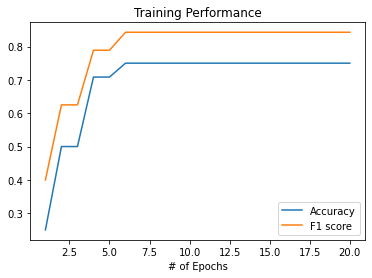

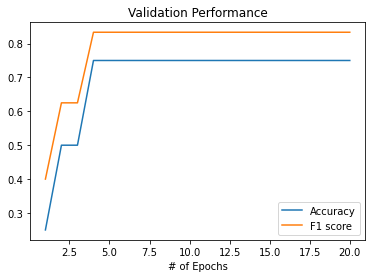

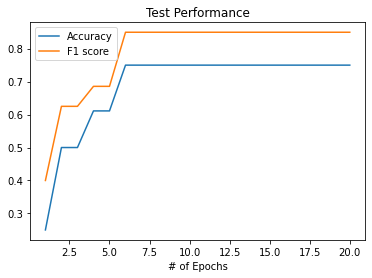

In [32]:
# plot the training accuracy and F1
plt.figure()
scores_train = np.array(scores_train)
plt.plot(np.linspace(1,NUM_EPOCHS,NUM_EPOCHS),scores_train)
plt.title('Training Performance')
plt.xlabel('# of Epochs')
plt.legend(['Accuracy','F1 score'])

# plot the validation accuracy and F1
plt.figure()
scores_val = np.array(scores_val)
plt.plot(np.linspace(1,NUM_EPOCHS,NUM_EPOCHS),scores_val)
plt.title('Validation Performance')
plt.xlabel('# of Epochs')
plt.legend(['Accuracy','F1 score'])

# plot the test accuracy and F1
plt.figure()
scores_test = np.array(scores_test)
plt.plot(np.linspace(1,NUM_EPOCHS,NUM_EPOCHS),scores_test)
plt.title('Test Performance')
plt.xlabel('# of Epochs')
plt.legend(['Accuracy','F1 score'])

In [33]:
print(model)

CNN1d(
  (conv1): Conv1d(1, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (ReLU): ReLU(inplace=True)
  (pool): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=5760, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=4, bias=True)
)
